# Exercise 7: the dehydration of ethanol
**SOLUTION**: adopted from: M. Dossena
Date: Wednesday 5 April 2023

**Submission deadline**: Sunday 16 April 2023

In this exercise we will investigate a very important chemical reaction, namely the production of ethene (ethylene) from ethanol. Ethanol is heated with an excess of concentrated sulphuric acid at a temperature of 170°C. The gases produced are passed through sodium hydroxide solution to remove the carbon dioxide and sulphur dioxide produced from side reactions. Another way to favor this reaction is in presence of a catalyst surface, which makes the reaction exothermic even at room temperature, and the free energy barrier for the reaction is highly reduced, so to obtain reasonable reaction rates. The use of hematite (an iron-based nanocrystal) as a catalyst is described computationally in [this paper (clickable link)](https://pubs.rsc.org/en/content/articlelanding/2016/RA/C6RA08509A#!divAbstract) by Lopes *et. al.*. We are interested in the gas phase reaction, in particular in the reactants and the products energy, to estimate the “energy of reaction”.

The reaction is the following:

\begin{equation}
    \text{CH}_3\text{CH}_2\text{OH} \longrightarrow \text{C}_2\text{H}_4 + \text{H}_2\text{O}
\end{equation}

and, in the gas phase, the equation looks like

![The dehydration of **(a)** ethanol after overcoming a **(b) transition state (TS)** into its **(c)** products: ethene and water.](ethanol.png "Figure 1")

In the supplementary material of the paper, which can be found [here](http://www.rsc.org/suppdata/c6/ra/c6ra08509a/c6ra08509a1.pdf), several calculations with different methods ranging from DFT to hybrid methods to even higher-level methods are described, together with the basis set dependence of the results. We will compare our results with those published by performing calculations within the DFT framework for two different functionals: the PBE parametrization of the generalized gradient approximation (GGA), introduced in Exercise 7, and the hybrid functional B3LYP (named after those who developed it: Becke, 3-parameter, Lee–Yang–Parr); within each functional we will optimize the geometry at two-three basis sets per functional, thereby obtaining a final (hopefully converged!) value for the total inner energy $U$. From here we will use thermodynamics to relate $U$ to the Gibbs free energy $G$; see the Figure below:

<img src="rxn-coord.png" alt="isolated" width="700"/>

# 0. Calculations with PBE

We begin by logging into our accounts on JupyterHub on Euler in a similar manner as described in the previous exercises, and `pull` the newest exercise files from the GitHub repository, making sure that you are in the directory for the course:
```bash
    $ cd ~/Molecular-and-Materials-Modelling-FS2023
    $ git init
  # $ git stash
    $ git pull https://github.com/ramador09/Molecular-and-Materials-Modelling-FS2023.git
```  

As mentioned earlier, we will be running calculations using two different functionals PBE and B3LYP, and each functional shall be run using different basis sets. We want to organize our calculations in a meaningful way. Within the `exercise-7-files` directory, make a directory for PBE:

```bash
$ mkdir PBE
```

In the current `exercise-7-files` directory you will find the following eight files:

* `H2O\_template.inp}` for the optimization of water and the corresponding `H2O.xyz` file providing the geometry;
* `ethanol\_template.inp` for the optimization of ethanol and the corresponding `ethanol.xyz` file providing the geometry;
* `ethylene\_template.inp` for the geometry optimization of ethylene and the corresponding `ethylene.xyz` file providing the geometry;
* `ts\_template.inp` for the transition state and the corresponding `ts.xyz` file providing the geometry`

Move into the `PBE` directory and make a new subdirectory `SZV`, the name of the first (and simplest) basis sets we will examine today, and move into the `SZV` directory:

```bash
$ cd PBE
$ mkdir SZV
$ cd SZV
```

Copy the `H2O_template.inp` file from the parent directory into the current one and rename it:

```bash
$ cp ../../H2O_template.inp .
$ mv H2O_template.inp H2O.inp
```

Submit the calculation on H2O in the current directory, either using a submit script from a previous week

```
#!/bin/bash

#SBATCH -N 2
#SBATCH -n 16
#SBATCH --time=4:00:00
#SBATCH --job-name="nice name"
#SBATCH --mem-per-cpu=1024
#SBATCH --output=stdout.txt
#SBATCH --error=stderr.txt

# module load openmpi/4.0.2
# module load gcc/6.3.0 openmpi/4.0.2 cp2k/8.2
/cluster/scratch/danielep/cp2k.ssmp -i input.inp > output.out
```

or by simply using the command line

```bash
/cluster/scratch/danielep/cp2k.ssmp -i input.inp > output.out
```

For the `H2O`, `ethanol`, and `ethene` projects, notice how the `RUN_TYPE` keyword in the `&GLOBAL` section of the input file is associated with `GEO_OPT`. This means (unsurprisingly) that we will be optimizing the geometry, as we've done in previous exercises. While the calculation is running, open a new Terminal in your launcher and visualize the the `H2O.inp` file with vim.

The structure and layout of the input files for `ethanol` and `ethene` are similar. Now, however, we open the input file for the **transition state** `ts.inp` and notice the change in the `&GLOBAL` section:

```
&GLOBAL
  PROJECT ts
  RUN_TYPE ENERGY
  PRINT_LEVEL LOW
&END GLOBAL
```

The `ENERGY` value associated to the `RUN_TYPE` keyword indicates that we are merely calculating the energy of the configuration and **explicitly not** optimizing the geometry --- indeed this is the case, since the geometry of the transition state is simply being provided (transition state theory is a whole Pandora's box...).

Execute the following cells and proceed to the first assignment.

In [20]:
import numpy as np
from ase.io import read
from ase.visualize import view
from ase.build import fcc111,add_adsorbate,molecule
import matplotlib.pyplot as plt
import nglview as nv

In [21]:
def view_structure(system):
    t = nv.ASEStructure(system) 
    w = nv.NGLWidget(t, gui=True)
    w.add_spacefill()
    return w

In [22]:
def view_trajectory(trajectory):
    t2 = nv.ASETrajectory(trajectory)
    w2 = nv.NGLWidget(t2, gui=True)
    w2.add_spacefill()
    return w2;

#### OPTIONAL Assignment 0: Functional derivatives

Given a functional $F[f]$ of the function $f(\textbf{r})$ of the coordinate $\textbf{r}$, the functional derivative $\delta F[f]/\delta f(\textbf{r})$ is defined by the relationship

$$
\lim_{\epsilon \rightarrow 0} \left[ \frac{F[f+\epsilon \delta f] - F[f]}{\epsilon} \right] = \int \frac{\delta F[f]}{\delta f(\textbf{r})}\delta f(\textbf{r})\text{d}\textbf{r},
$$

where $\delta f(\textbf{r})$ is an arbitrarily "small" and well-behaved function of $r$. Using this definition, calculate the functional derivative of the following function\textbf{als}:
$$
F_1[f] = \int f(\textbf{r}) g(\textbf{r}) \text{d}(\textbf{r}), \newline
F_2[f] = \int f^{5/3}(\textbf{r}) \text{d}(\textbf{r}), \newline
F_3[f] = \iint \frac{f{(\textbf{r})} f{(\textbf{r}')} g{(\textbf{r})} g{(\textbf{r}')}}{|\textbf{r}-\textbf{r}'|} d\textbf{r} d\textbf{r}' , \\
F_4[f] = \int \frac{\nabla f(\textbf{r}) \cdot \nabla f(\textbf{r}) }{f(\textbf{r})} d\textbf{r}, \\
F_5[\delta] = \delta (\textbf{r} - \textbf{r}_0)
$$


## 1. Calculations with PBE

#### Assignment 1:The remaining simulations for the SVZ basis set
Repeat and submit the remaining calculations for `ethanol.inp`, `ethene.inp`, and `ts.inp` for the PBE.

#### End Assignment 1

#### Assignment 2: Visualization of the structures trajectories, and orbitals
Visualize the structures and trajectories of the reactant ethanol as well as of the products ethene and water. Remember that the trajectory will have been generated as an output file in the following nominal format: `project_name-pos-1.xyz`.

The three geometry optimizations produce one `.cube` file every step, and they are named according to `project_name-WFN_orbital_number_1-1-_step_number.cube`; use code from exercise 6 to visualize the HOMO and LUMO orbitals of the optimized geometries of all three molecules.

In [24]:
TRAJ_H2O = './H2O/PBE/SZV/H2O-pos-1.xyz'
traj_H2O = read(TRAJ_H2O, index=":")
view_trajectory(traj_H2O)

NGLWidget(max_frame=10)

___The shape assumed by the H2O molecule is the usual one (with 104.5 degree angle)___

In [25]:
TRAJ_ETHENE = './ETHENE/PBE/SZV/ethene-pos-1.xyz'
traj_ETHENE = read(TRAJ_ETHENE, index=":")
view_trajectory(traj_ETHENE)

NGLWidget(max_frame=4)

In [26]:
TRAJ_ETHANOL = './ETHANOL/PBE/SZV/ethanol-pos-1.xyz'
traj_ETHANOL = read(TRAJ_ETHANOL, index=":")
view_trajectory(traj_ETHANOL)

NGLWidget(max_frame=5)

___The ethene and ethanol relax in the ground states___

In [27]:
file = './H2O/PBE/SZV/H2O-WFN_00004_1-1_l.cube'
atoms = read(file)

view = nv.NGLWidget()
view.add_component(nv.ASEStructure(atoms))

c_2 = view.add_component(file)
c_2.clear()
c_2.add_surface(color='blue', isolevelType="value", isolevel=-0.01, opacity=0.05)

c_3=view.add_component(file)
c_3.clear()
c_3.add_surface(color='green', isolevelType="value", isolevel=0.01, opacity=0.15)

view

NGLWidget()

___The H2O HOMO is a bonding orbital (the wavefunction is not 0 in the bond direction)___

In [28]:
file = './H2O/PBE/SZV/H2O-WFN_00005_1-1_l.cube'
atoms = read(file)

view = nv.NGLWidget()
view.add_component(nv.ASEStructure(atoms))

c_2 = view.add_component(file)
c_2.clear()
c_2.add_surface(color='blue', isolevelType="value", isolevel=-0.01, opacity=0.05)

c_3=view.add_component(file)
c_3.clear()
c_3.add_surface(color='green', isolevelType="value", isolevel=0.01, opacity=0.15)

view

NGLWidget()

___The H2O LUMO is an anti-bonding orbital (the wavefunction is 0 in the bond direction)___

In [29]:
file = './ETHENE/PBE/SZV/ethene-WFN_00006_1-1_l.cube'
atoms = read(file)

view = nv.NGLWidget()
view.add_component(nv.ASEStructure(atoms))

c_2 = view.add_component(file)
c_2.clear()
c_2.add_surface(color='blue', isolevelType="value", isolevel=-0.01, opacity=0.05)

c_3=view.add_component(file)
c_3.clear()
c_3.add_surface(color='green', isolevelType="value", isolevel=0.01, opacity=0.15)

view

NGLWidget()

___The ethene HOMO is a bonding orbital for both C-C and C-H bonds___

In [30]:
file = './ETHENE/PBE/SZV/ethene-WFN_00007_1-1_l.cube'
atoms = read(file)

view = nv.NGLWidget()
view.add_component(nv.ASEStructure(atoms))

c_2 = view.add_component(file)
c_2.clear()
c_2.add_surface(color='blue', isolevelType="value", isolevel=-0.01, opacity=0.05)

c_3=view.add_component(file)
c_3.clear()
c_3.add_surface(color='green', isolevelType="value", isolevel=0.01, opacity=0.15)

view

NGLWidget()

___The LUMO orbital for ethene is bonding for C-H but anti-bonding for the C-C bond___

In [31]:
file = './ETHANOL/PBE/SZV/ethanol-WFN_00010_1-1_l.cube'
atoms = read(file)

view = nv.NGLWidget()
view.add_component(nv.ASEStructure(atoms))

c_2 = view.add_component(file)
c_2.clear()
c_2.add_surface(color='blue', isolevelType="value", isolevel=-0.01, opacity=0.05)

c_3=view.add_component(file)
c_3.clear()
c_3.add_surface(color='green', isolevelType="value", isolevel=0.01, opacity=0.15)

view

NGLWidget()

___For ethanol, the HOMO is mainily localized around the OH bond___

In [32]:
file = './ETHANOL/PBE/SZV/ethanol-WFN_00011_1-1_l.cube'
atoms = read(file)

view = nv.NGLWidget()
view.add_component(nv.ASEStructure(atoms))

c_2 = view.add_component(file)
c_2.clear()
c_2.add_surface(color='blue', isolevelType="value", isolevel=-0.01, opacity=0.05)

c_3=view.add_component(file)
c_3.clear()
c_3.add_surface(color='green', isolevelType="value", isolevel=0.01, opacity=0.15)

view

NGLWidget()

___The LUMO for ethanol is delocalized over the entire molecule___

In [33]:
file = './TS/PBE/SZV/ts-WFN_00010_1-1_0.cube'
atoms = read(file)

view = nv.NGLWidget()
view.add_component(nv.ASEStructure(atoms))

c_2 = view.add_component(file)
c_2.clear()
c_2.add_surface(color='blue', isolevelType="value", isolevel=-0.01, opacity=0.05)

c_3=view.add_component(file)
c_3.clear()
c_3.add_surface(color='green', isolevelType="value", isolevel=0.01, opacity=0.15)

view

NGLWidget()

In [34]:
file = './TS/PBE/SZV/ts-WFN_00011_1-1_0.cube'
atoms = read(file)

view = nv.NGLWidget()
view.add_component(nv.ASEStructure(atoms))

c_2 = view.add_component(file)
c_2.clear()
c_2.add_surface(color='blue', isolevelType="value", isolevel=-0.01, opacity=0.05)

c_3=view.add_component(file)
c_3.clear()
c_3.add_surface(color='green', isolevelType="value", isolevel=0.01, opacity=0.15)

view

NGLWidget()

___Both the LUMO and the HOMO for the transition state are localized over the entire molecule___

In [ ]:
# Points: 10/10

#### End Assignment 2

## 2. Calculations with B3LYP

Once the above calculations have concluded, we want to perform the identical calculations, except using B3LYP as a functional. B3LYP is what is known as a **hybrid (exchange-correlation) functional** because the separate exchange $X$ and correlation $C$ effects are each defined as a mixture ('hybrid') between the exact exchange from Hartree-Fock and that from a GGA functional. The formula for the B3LYP xc-functional is

\begin{equation}
    E_{XC}^{B3LYP} = E_{X}^{LDA} + a_0(E_{X}^{HF}-E_{X}^{LDA}) + a_X(E_{X}^{GGA}-E_{X}^{LDA}) + E_{C}^{LDA} + a_C(E_{C}^{GGA} - E_{C}^{LDA}),
\end{equation}

where $E_{C}^{GGA}$ is a correlation energy obtained within the GGA framework, and $E_{X}^{GGA}$ is the exchange energy also within GGA. The three parameters (hence the 3 in B3LYP) are set to $a_0=0.2, a_X=0.72$, and $a_C=0.81$.

We obviously need to modify the input file accordingly. Move back into the parent `exercise-7-files` directory and make a new folder there named `B3LYP`. Within the new `B3LYP` folder, make a new subfolder `SZV`, in which we will perform B3LYP calculations using the SZV basis set:

```bash
$ cd ../..
$ mkdir B3LYP
$ cd B3LYP
$ mkdir SZV
$ cd SZV
```

Just as for the PBE case, copy the `H2O_template.inp` file from the parent `exercise-7-files` directory into the current one and rename it:

```bash
$ cp ../../H2O_template.inp .
$ mv H2O_template.inp H2O.inp
```

Open the `H2O.inp` file using vim and replace the entire `&XC` section with:

```
 &XC
   &XC_FUNCTIONAL
     &LYP
       SCALE_C 0.81 ! mixing parameters explained above
     &END
     &BECKE88
       SCALE_X 0.72
     &END
     &XALPHA
       SCALE_X 0.08
     &END
   &END XC_FUNCTIONAL
   &HF
     &SCREENING
       EPS_SCHWARZ 1.0E-10
     &END
     &MEMORY
       MAX_MEMORY 5
     &END
     FRACTION 0.20
   &END
 &END XC
```

#### Assignment 3: The simulations for the SZV basis set: B3LYP

Save and close the `H2O.inp` file, and finally submit the calculation.

Then repeat the above procedures and and submit the calculations for `ethanol.inp`, `ethene.inp`, and `ts.inp` for the B3LYP hybrid functional. My simulation for the SZV basis set took about 20mins.

#### End Assignment 3

# 3. An excourse on basis sets in CP2K and an analysis of our results

A terse introduction to the framework of basis sets in CP2K can be found [here](https://www.cp2k.org/basis_sets). The basis sets that we have / we will examine in this exercise are, in increasing order of complexity:

* SZV-MOLOPT-GTH
* DZVP-MOLOPT-GTH
* TZVP-MOLOPT-GTH
* TZV2P-MOLOPT-GTH
* TZV2PX-MOLOPT-GTH

where SZ, DZ, and TZ stand for single-, double-, and triple-zeta, respectively, and refer to how many functions are used to describe each atomic orbital: in this sense, it gives an idea as to the flexibility of each basis set. For instance, in TZ, each primitive vector is treated as a full-fledged basis function, which is better in regards to accuracy, yet is (of course) more expensive computationally. `V` stands for valence: here, it means that only valence orbitals are split, whereas core orbitals are not. `P` stands for polarized, and means that extra functions are included in order to include the polarization of the electron density. The label `MOLOPT` indicates that these sets are optimized to perform accurate molecular calculations. In this library the larger basis sets are selected as extensions of smaller ones.

Following the spirit of [Lopes *et. al.* (clickable link)](https://pubs.rsc.org/en/content/articlelanding/2016/RA/C6RA08509A#!divAbstract), we want to perform the above calculations using both functionals PBE and B3LYP using a total of two or three of the above basis sets, and finally compare the results with those of the paper.

#### Assignment 4: Simulations for both PBE and B3LYP functionals using other basis sets
Repeat the simulations for the geomtry optimization `GEO_OPT` of `ethanol`, `ethene`, and `H2O`, as well as the `ENERGY` run for the transition state `ts`, using the `DZVP-MOLOPT-GTH` and `TZVP-MOLOPT-GTH` basis sets. The **only** thing you'll need to change in the respective input files is the value of the `BASIS_SET` keyword under the `&KIND` subsection:

```
&KIND H
   BASIS_SET DZVP-MOLOPT-GTH
   POTENTIAL GTH-PBE-q1
 &END KIND
```
 
Change this for all atom species in the input file. Notice that we leave the value of the `POTENTIAL` keyword the same! This is because our treatment using pseudopotentials does not chnage from functional to functional or basis set to basis set. As an "upper bound": my simulation for `ethanol` using the `TZVP-MOLOPT-GTH` basis set with the B3LYP hybrid functional took about 70mins.

#### End Assignment 4

#### Assignment 5: Reproduction of the energy profiles for functionals and basis sets
Reproduce the energy profiles of Fig. 4 in [the paper](https://pubs.rsc.org/en/content/articlepdf/2016/ra/c6ra08509a) by plotting the absolute energies
vs. the reaction species for each of your simulations. The converged energy is just the final value at the bottom of the respective output file. You’ll have six different
curves (2 functionals PBE, B3LYP × 3 basis sets SZV, DZVP, TZVP), so you
can, depending on how you scale the axes, just superimpose them onto one graph.
**Important!: don’t forget that CP2K output files are in atomic units, so
a unit conversion from e.g., Ha energies to eV might be sensible.**

([<matplotlib.axis.XTick at 0x299a649d0>,
 [Text(0, 0, 'Ethanol'), Text(1, 0, 'TS'), Text(2, 0, 'Ethene+H2O')])

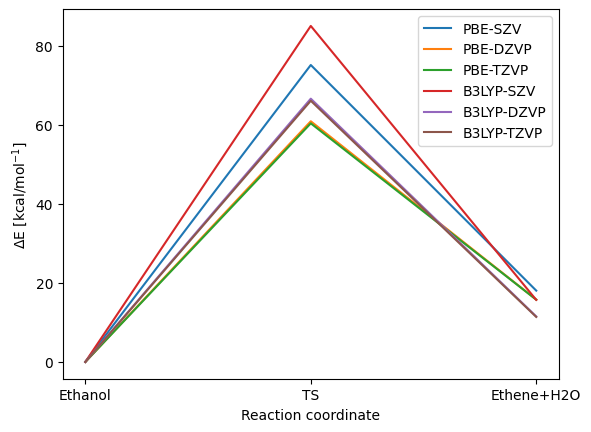

In [18]:
ETHANOL = np.array([-30.841620838230462, -30.970112569272558, -30.971374761317904, -30.591813945023368,  -30.723892836228742, -30.725284805420205])
ETHENE = np.array([-13.657781801039581, -13.724397329563459, -13.724818867583394, -13.505003046930963, -13.579843580303779, -13.580483230169628])
H2O = np.array([-17.155081639820665, -17.220578294627767, -17.221460003888804, -17.061794524305014, -17.125709717952205, -17.126659511999272])
TS = np.array([-30.721887932351436, -30.873072579667699, -30.875170278421564, -30.456325375565129, -30.617741717568794, -30.619977848390068])

conv_kcalmol = 627.503

ETHANOL = ETHANOL * conv_kcalmol
ETHENE = ETHENE * conv_kcalmol
H2O = H2O * conv_kcalmol
TS = TS * conv_kcalmol

P1 = ETHANOL - ETHANOL
P2 = TS - ETHANOL
P3 = ETHENE + H2O - ETHANOL

plt.plot([P1,P2,P3])
plt.legend(['PBE-SZV','PBE-DZVP','PBE-TZVP','B3LYP-SZV','B3LYP-DZVP','B3LYP-TZVP'])
plt.xlabel('Reaction coordinate')
plt.ylabel('$\Delta$E [kcal/mol$^{-1}$]')
plt.xticks(np.arange(3), ['Ethanol', 'TS', 'Ethene+H2O'])



___From the plot, we clearly see that the energy difference of the TS is overestimated by PBE with respect to B3LYP. In case of the final state, PBE instead underestimates it. Regarding the basis set, it is evident that the SZV case is not converged, both for PBE and B3LYP, while DZVP and TZVP gave almost the same result. The result closer to the literature is of course the B3LYP-TZVP(DZVP) one___

In [ ]:
# Points: 20/20

#### End Assignment 5

#### Assignment 6: Reproduction of the rate constant for the reaction $k(T)$
Thermodynamics defines the temperature-dependent **rate constant** $k(T)$ as

$$k(T)=\frac{k_BT}{2\pi\hbar C}\exp(-\Delta G / RT),$$

where $k_B$ is the Boltzmann constant, $T$ the absolute temperature, $\hbar$ the reduced Planck constant, $C$ the standard concentration of 1 mol $L^{-1}$, $G$ the **Gibbs free energy**, and $R$ the universal gas constant. The **Gibbs free energy** is in turn defined in terms of the **enthalpy** $H=U+pV$ as

$$ G=H-TS, $$

where $U$ is the **internal energy** (which we obtain from our converged calculations), $p$ the pressure, $V$ the volume, and $S$ the entropy. By considering only *differences* in the various energies, we posit
$$\Delta G = \Delta H = \Delta U. $$

The equation for $k(T)$ then becomes
$$ k(T)=\frac{k_BT}{2\pi\hbar C}\exp(-\Delta U / RT), $$

where $\Delta U := U_{\text{final}} - U_{\text{init}}$ is obtained from our calculations. Consistent with the literature (and with the notation in Fig. 2), anything having to do with the **transition state** takes a superscript double-dagger: thus, $U^\ddagger$, $G^\ddagger$, etc. Reproduce the gasphase plot (black squares) of Fig. 6 [the paper](https://pubs.rsc.org/en/content/articlepdf/2016/ra/c6ra08509a) by plotting $\log[k^\ddagger(T)]$ vs. $T$, with

$$k^\ddagger(T)=\frac{k_BT}{2\pi\hbar C}\exp(-\Delta U^\ddagger / RT),$$

and using the identification that $U^\ddagger=U_{\text{TS}} - U_{\text{ethanol}}$ for about 20 evenly-spaced values of $T$ between 300K and 1300K. Just like in Exercise 5, you'll have six different curves (2 functionals PBE, B3LYP x 3 basis sets SZV, DZVP, TZVP), so you can, depending on how you scale the axes, just superimpose them onto one graph.

Text(0, 0.5, 'ln(k)')

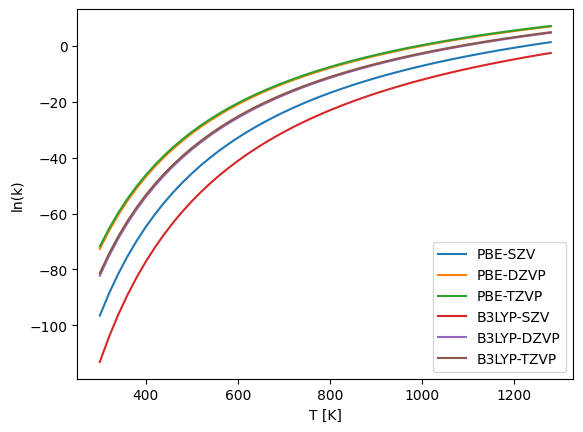

In [19]:
T = np.arange(300,1300,20)

deltaU = TS - ETHANOL

kB = 1.380649e-23
hbar = 1.054571817e-34
C = 6.02214076e23
C = 1
R = 1.98720425864083e-3

for i in range(6):
    plt.plot(T,np.log(kB*T/(2*np.pi*hbar*C)*np.exp(-deltaU[i]/(R*T))))
    
plt.legend(['PBE-SZV','PBE-DZVP','PBE-TZVP','B3LYP-SZV','B3LYP-DZVP','B3LYP-TZVP'])
plt.xlabel('T [K]')
plt.ylabel('ln(k)')

___Similar to the previous case, the result closer to the paper is the B3LYP-TZVP(DZVP) one. Also in this case the SZV result is not converged___

In [ ]:
# Points: 20/20

#### End Assignment 6

In [ ]:
"""
Subtotal: 65/65
Bonus: 10 for the optional exercise 0
Total: 75/65
"""